zbiór iris https://www.kaggle.com/code/kostasmar/exploring-the-iris-data-set-scikit-learn

zbiór wine https://www.kaggle.com/datasets/yasserh/wine-quality-dataset

breat cancer https://www.kaggle.com/code/mragpavank/breast-cancer-wisconsin

diabetes https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset

heart disease https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

titanic https://www.kaggle.com/datasets/brendan45774/test-file


In [ ]:
#załadowanie bibliotek
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [1]:
# funkcje do załadowania zbiorów danych z transformacjami

def load_iris():
  df = pd.read_csv('Iris.csv')
  df['Species'] = df['Species'].apply(lambda x: x[5:])
  df = df.iloc[:,1:]
  X = df.iloc[:,0:4]
  y = df['Species']
  return df, X, y

def load_breastCancer():
  df = pd.read_csv('breast-cancer.csv')
  df = df.iloc[:,1:32] # bez pierwszej i ostatniej zmiennej (id,x)
  X = df.iloc[:,2:32]
  y = df['diagnosis']
  return df, X, y

def load_diabetes():
  df = pd.read_csv('diabetes.csv')
  X = df.iloc[:,:8]
  y = df['Outcome']
  return df, X, y

def load_heart():
  df = pd.read_csv('heart.csv')
  X = df.iloc[:,:13]
  y = df['target']
  return df, X, y

def load_wine():
  df = pd.read_csv('WineQT.csv')
  df = df.iloc[:,:12]
  X = df.iloc[:,:11]
  y = df['quality']
  return df, X, y

def load_titanic():
  df = pd.read_csv('titanic.csv')
  df.dropna(inplace=True)
  df = df[['Survived', 'Pclass','Sex','Age','SibSp','Parch','Fare']]
  df['Sex'] = df['Sex'].map({'female':0, 'male':1})
  X = df.iloc[:,1:]
  y = df['Survived']
  return df, X, y


In [ ]:
#deklarowanie tabeli z danymi i podziału na zmienne zależne i niezależna
# df - tabela z danymi
# X - predyktory
# y - zmienna przewidywana
df, X, y = load_iris()

In [ ]:
#ustawienie globalnych parametrów
seed = 1            #ziarno do generatora liczb losowych
test_prop = 0.3     #proporcja próby testowej

### Eksploracja danych

In [ ]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
y.value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


<Axes: >

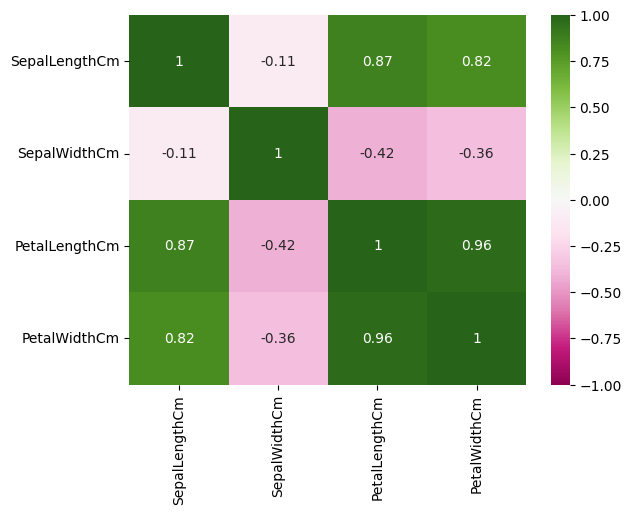

In [ ]:
sns.heatmap(X.corr(), cmap="PiYG", vmin=-1,annot=True) #annot = True

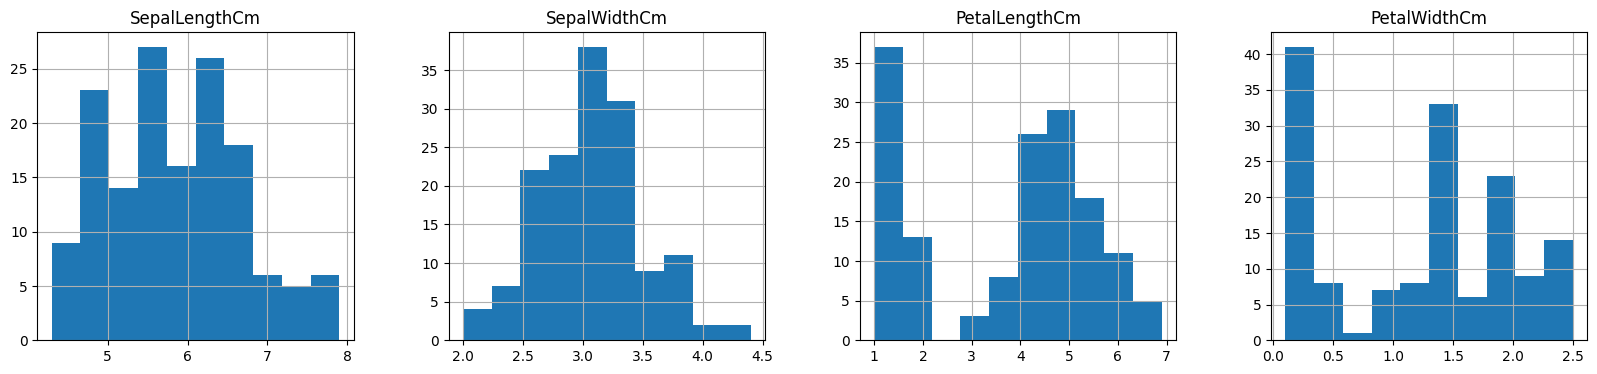

In [ ]:
#wykresy dla zmiennych predykcyjnych
fig, axis = plt.subplots(1, X.shape[1], figsize=(20,4))

#create histogram for each column in DataFrame
X.hist(ax=axis)
plt.show()

### Drzewo klasyfikacyjne

In [ ]:
#import klasyfikatora z biblioteki scikit.learn
from sklearn import tree
clf = tree.DecisionTreeClassifier()

#podział zbioru na uczący i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_prop, random_state=seed)

#uczenie modelu
clf = clf.fit(X_train,y_train)

#tworzenie predykcji
y_pred = clf.predict(X_test)

#sprawdzenie jakości dopasowania modelu
drzewo_acc = accuracy_score(y_test, y_pred)
print("Accuracy:", drzewo_acc)
print(f"Drzewo klasyfikuje poprawnie {drzewo_acc:.1%} przypadków ze zbioru testowego.")

Accuracy: 0.9555555555555556
Drzewo klasyfikuje poprawnie 95.6% przypadków ze zbioru testowego.


In [ ]:
#macierz pomyłek
confusion_matrix(y_test,y_pred)

array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 12]])

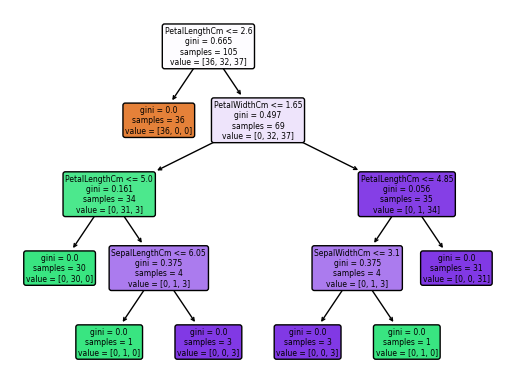

In [ ]:
#wykres drzewa
tree.plot_tree(clf, filled = True, rounded = True, feature_names = X.columns)
plt.show()

In [ ]:
#szukanie optymalnych hiperparametrów drzewa

#określenie szukanychh hipermarametrów
parameters = {'criterion':['gini','entropy'],
              'max_depth':np.arange(1,21).tolist()[0::2],
              'min_samples_split':np.arange(2,11).tolist()[0::2],
              'max_leaf_nodes':np.arange(3,26).tolist()[0::2]}

# tworzenie obiektu szukającego wartości parametrów
g1 = GridSearchCV(tree.DecisionTreeClassifier(), parameters, cv=5, n_jobs=-1)

# szukanie parametrów i sprawdzenie czasu
g1.fit(X_train,y_train)

cls_params1 = g1.best_params_
cls_params1

{'criterion': 'gini',
 'max_depth': 3,
 'max_leaf_nodes': 5,
 'min_samples_split': 2}

In [ ]:
#tworzenie drzewa z optymalnymi parametrami
clf1 = tree.DecisionTreeClassifier(criterion = cls_params1['criterion'],
                                   max_depth = cls_params1['max_depth'],
                                   max_leaf_nodes = cls_params1['max_leaf_nodes'],
                                   min_samples_split = cls_params1['min_samples_split'])

#uczenie drzewa
clf1 = clf1.fit(X_train,y_train)

#tworzenie predykcji
y_pred = clf1.predict(X_test)

#sprawdzenie jakości dopasowania modelu
drzewo_acc = accuracy_score(y_test, y_pred)
print("Accuracy:", drzewo_acc)
print(f"Drzewo klasyfikuje poprawnie {drzewo_acc:.1%} przypadków ze zbioru testowego.")

Accuracy: 0.9555555555555556
Drzewo klasyfikuje poprawnie 95.6% przypadków ze zbioru testowego.


In [ ]:
#macierz pomyłek
confusion_matrix(y_test,y_pred)

array([[16,  0,  0],
       [ 0, 10,  1],
       [ 0,  1, 17]])

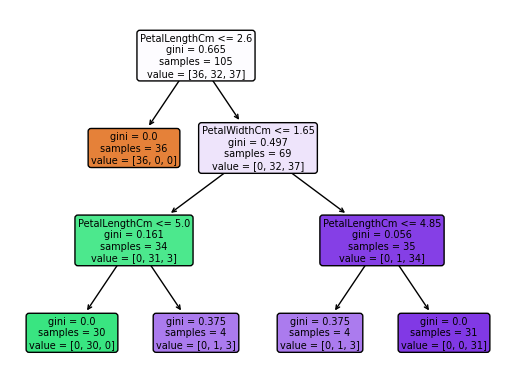

In [ ]:
#wykres drzewa (po optymalizacji hiperparametrów)
tree.plot_tree(clf1, filled = True, rounded = True, feature_names = X.columns)
plt.show()

### Random Froest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)

#podział zbioru na uczący i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_prop, random_state=seed)
#uczenie modelu
rf = rf.fit(X_train,y_train)

#tworzenie predykcji
y_pred = rf.predict(X_test)

#sprawdzenie jakości dopasowania modelu
rf_acc = accuracy_score(y_test, y_pred)
print("Accuracy:", rf_acc)
print(f"Random Forest poprawnie {rf_acc:.1%} przypadków ze zbioru testowego.")

Accuracy: 0.9555555555555556
Random Forest poprawnie 95.6% przypadków ze zbioru testowego.


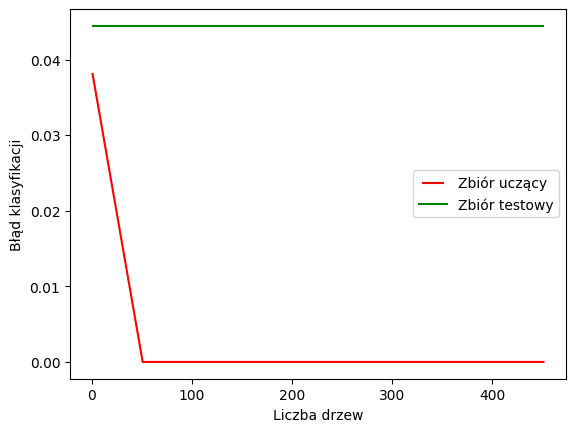

In [ ]:
#wykres obrazujący jak zmienia się błąd klasyfikacji w zależności od liczy drzew
train_results = []
test_results = []
list_nb_trees = np.arange(1,500).tolist()[::50]

for nb_trees in list_nb_trees:
    rf = RandomForestClassifier(n_estimators=nb_trees)
    rf.fit(X_train, y_train)

    train_results.append(1-accuracy_score(y_train, rf.predict(X_train)))
    test_results.append(1-accuracy_score(y_test, rf.predict(X_test)))

line1, = plt.plot(list_nb_trees, train_results, color="r", label="Zbiór uczący")
line2, = plt.plot(list_nb_trees, test_results, color="g", label="Zbiór testowy")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Błąd klasyfikacji')
plt.xlabel('Liczba drzew')
plt.show()

### KNN

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

#podział zbioru na uczący i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_prop, random_state=seed)

#normalizacja zmiennych
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#uczenie modelu
knn = knn.fit(X_train,y_train)

#tworzenie predykcji
y_pred = knn.predict(X_test)

#sprawdzenie jakości dopasowania modelu
knn_acc = accuracy_score(y_test, y_pred)
print("Accuracy:", knn_acc)
print(f"KNN klasyfikuje poprawnie {knn_acc:.1%} przypadków ze zbioru testowego.")

Accuracy: 0.9555555555555556
KNN klasyfikuje poprawnie 95.6% przypadków ze zbioru testowego.


Accuracy: 0.9777777777777777
KNN poprawnie 97.8% przypadków ze zbioru testowego.


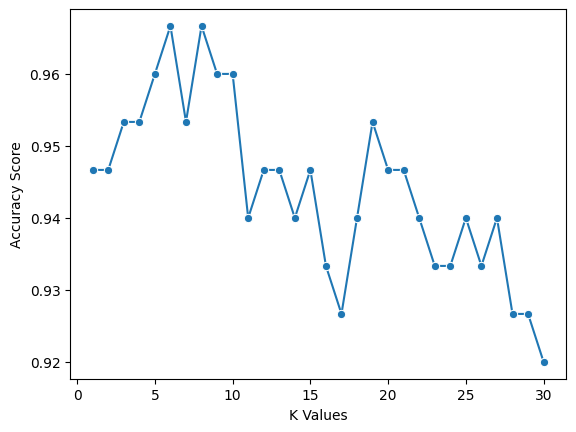

In [ ]:
#szukanie optymalnych wartości parametru k
k_values = [i for i in range (1,31)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

knn_acc = accuracy_score(y_test, y_pred)
print("Accuracy:", knn_acc)
print(f"KNN poprawnie {knn_acc:.1%} przypadków ze zbioru testowego.")

In [ ]:
#optymalizacja parametru K z użyciem GridSerachCV
kf=KFold(n_splits=5,shuffle=True,random_state=42)
parameter={'n_neighbors': np.arange(2, 30, 1)}
knn=KNeighborsClassifier()
knn_cv=GridSearchCV(knn, param_grid=parameter, cv=kf, verbose=1)
knn_cv.fit(X_train, y_train)
print(knn_cv.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'n_neighbors': 8}


In [ ]:
#optymalny model
knn=KNeighborsClassifier(n_neighbors = knn_cv.best_params_['n_neighbors'])
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
knn_acc = accuracy_score(y_test, y_pred)
print("Accuracy:", knn_acc)
print(f"KNN poprawnie {knn_acc:.1%} przypadków ze zbioru testowego.")

Accuracy: 0.9777777777777777
KNN poprawnie 97.8% przypadków ze zbioru testowego.


### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

#podział zbioru na uczący i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_prop, random_state=seed)

#uczenie modelu
nb = nb.fit(X_train,y_train)

#tworzenie predykcji
y_pred = nb.predict(X_test)

#sprawdzenie jakości dopasowania modelu
nb_acc = accuracy_score(y_test, y_pred)
print("Accuracy:", nb_acc)
print(f"Naive Bayes klasyfikuje poprawnie {nb_acc:.1%} przypadków ze zbioru testowego.")

Accuracy: 0.9333333333333333
Naive Bayes klasyfikuje poprawnie 93.3% przypadków ze zbioru testowego.


### Podsumowanie

In [ ]:
#podsymowanie jakości klasyfikacji poszczególnych metod
print(f'Drzewo: {drzewo_acc:.1%}')
print(f'Random Forest: {rf_acc:.1%}')
print(f'KNN: {knn_acc:.1%}')
print(f'Naive Bayes: {nb_acc:.1%}')

Drzewo: 95.6%
Random Forest: 95.6%
KNN: 97.8%
Naive Bayes: 93.3%
